# Lorenz curves

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import matplotlib.pyplot as plt
from itrx import Itr

from utils import CATEGORIES, Month, load_crime_data, lorenz_curve, monthgen

In [8]:
# get the crime data
FORCE = "Metropolitan"
crime_data = load_crime_data(FORCE, Itr(monthgen(Month(2025, 5), backwards=True)).take(36).rev())
crime_data

,Month,Reported by,Falls within,Location,LSOA code,LSOA name,Crime type,geometry
Crime ID,,,,,,,,
0df7d1deccb4f26149c579a2f7073b0b990fbd66c5f1e80ed564bbe3d41a0d4d,2022-06,Metropolitan Police Service,Metropolitan Police Service,On or near Clarendon Road,E01031370,Adur 001E,Violence and sexual offences,POINT (523600.017 105752.988)
e2b83093d00a58cd8f02861cccaa247e08dfd1e0a128f9a18394730a3b3d5838,2022-06,Metropolitan Police Service,Metropolitan Police Service,On or near Northumberland Avenue,E01023983,Ashford 003A,Violence and sexual offences,POINT (601856.979 144253.995)
7b66975115c00ba3d7e1570cd5bb17d0e08f48e0b87b51a3fb72fb869900ea64,2022-06,Metropolitan Police Service,Metropolitan Police Service,On or near Haines Close,E01017706,Aylesbury Vale 012B,Violence and sexual offences,POINT (479904.984 214983.988)
c9e87191ba21fa37ee199b9e361672310cb91a8d33db79a3868e191e08e313db,2022-06,Metropolitan Police Service,Metropolitan Police Service,On or near Devlin Road,E01029909,Babergh 005E,Drugs,POINT (612874 242265.002)
None,2022-06,Metropolitan Police Service,Metropolitan Police Service,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,POINT (548160.971 189365.001)
...,...,...,...,...,...,...,...,...
841c7472dd5b58d67293259770a2777bb3466cb9ed313b9c0b0f60b010d5bdf4,2025-05,Metropolitan Police Service,Metropolitan Police Service,On or near Paxmead Crescent,E01031781,Worthing 005D,Violence and sexual offences,POINT (515571.006 104829.998)
38eb18c6e582a56dc2161400fa93cc054abd3c30a490f8fdbedc60ad7174556a,2025-05,Metropolitan Police Service,Metropolitan Police Service,On or near Prince Charles Road,W01000413,Wrexham 010C,Violence and sexual offences,POINT (334957.973 350062.006)
bcf81ca29284df091bd71edac1f944dbfbb145c094535f6b421f76c498acc003,2025-05,Metropolitan Police Service,Metropolitan Police Service,On or near The Orchards,W01000424,Wrexham 012E,Violence and sexual offences,POINT (334628.015 349241.038)


In [9]:
# compute spatio-temporo-categorical counts
all_lsoas = crime_data["LSOA code"].unique()
all_categories = crime_data["Crime type"].unique()
counts = crime_data.groupby(["Month", "LSOA code", "Crime type"])["Reported by"].count()
counts

Month    LSOA code  Crime type                  
2022-06  E01000001  Other theft                     1
                    Robbery                         1
                    Theft from the person           1
                    Violence and sexual offences    1
         E01000002  Other theft                     2
                                                   ..
2025-05  E01035722  Violence and sexual offences    6
         W01000057  Other crime                     1
         W01000413  Violence and sexual offences    1
         W01000424  Violence and sexual offences    1
         W01000980  Violence and sexual offences    1
Name: Reported by, Length: 1088691, dtype: int64

## See how stable rates are for 3 categories

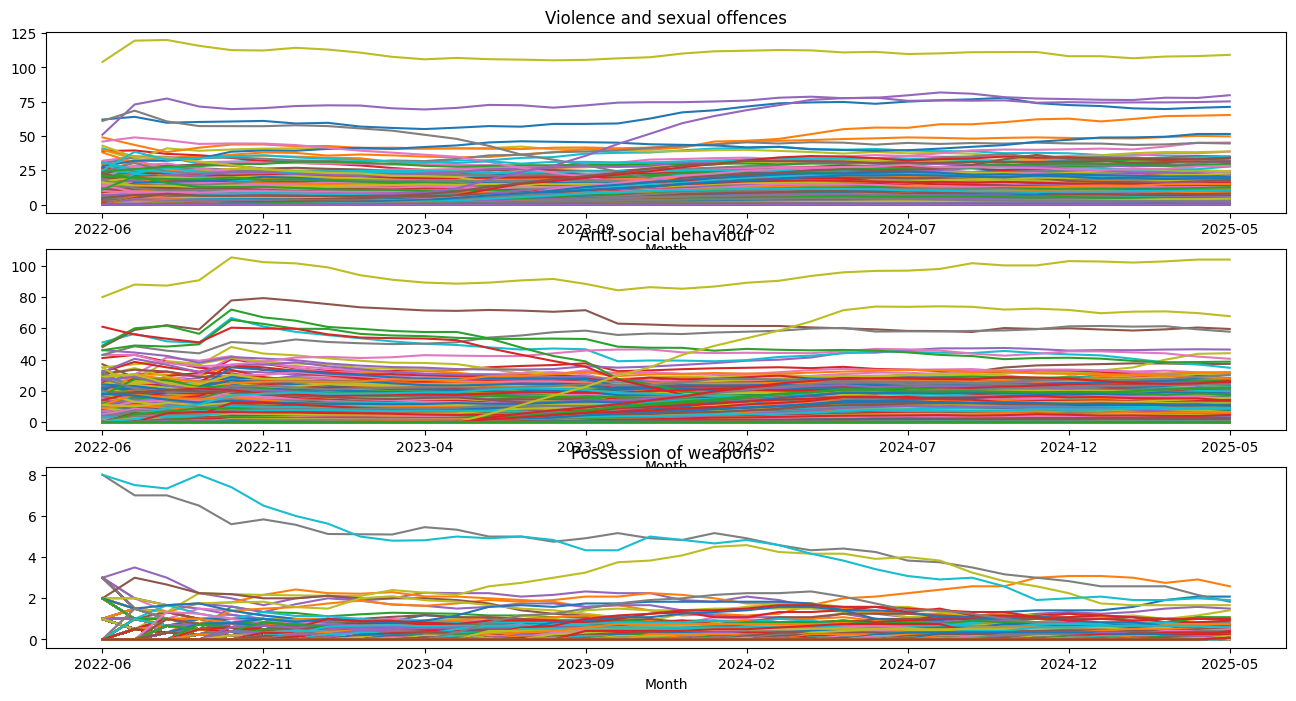

In [5]:
fig, axs = plt.subplots(3, figsize=(18, 9))
for i, category in enumerate(CATEGORIES):
    cat_counts = (
        counts.loc[(slice(None), slice(None), category)]
        .unstack(level="LSOA code", fill_value=0)
        .rolling(12, min_periods=1)
        .mean()
    )
    cat_counts.plot(legend=False, figsize=(16, 8), title=category, ax=axs[i])

## Compute Lorenz curves for the 3 year mean in each locations for each category

Text(0.5, 1.0, 'Lorenz curves')

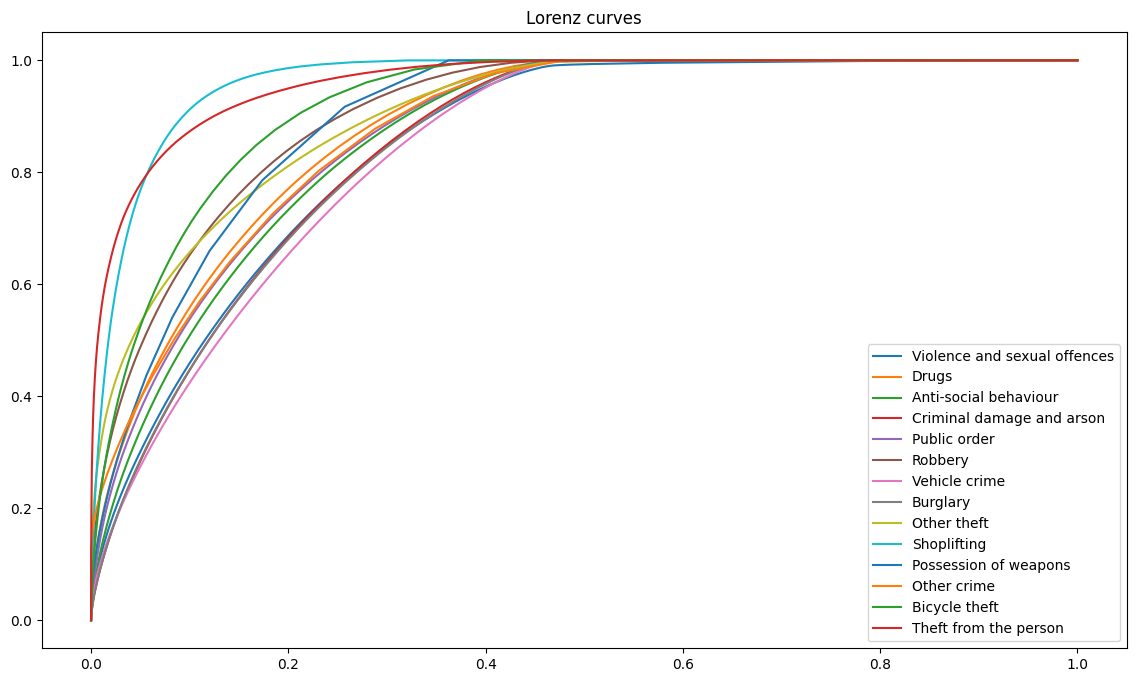

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))
for category in all_categories:
    # annualise (somewhat pointless as is gets normalised)
    cat_means = counts.loc[(slice(None), slice(None), category)].unstack(level="LSOA code", fill_value=0).mean() * 12
    # ensure we include LSOAs where no crimes occurred in this category
    cat_means = cat_means.reindex(all_lsoas, fill_value=0).sort_values()
    # cat_counts.plot(legend=False, figsize=(16, 8), title=category, ax=axs[i])
    lc = lorenz_curve(cat_means)
    lc.plot(label=category, ax=ax)
ax.legend()
ax.set_title("Lorenz curves")